In [13]:
#Primero, importamos las bibliotecas necesarias
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split


# 1) Regresión Logistica Binomial

In [14]:
import random
# Creamos los datos
data = {
    'nota_examen': [random.randint(60, 100) for _ in range(200)],
    'puntaje_aptitud': [random.randint(70, 100) for _ in range(200)]
}

# Establecemos la relación entre nota_examen y admitido
data['admitido'] = [
    1 if nota >= 80 and puntaje >= 80 else 0 
    for nota, puntaje in zip(data['nota_examen'], data['puntaje_aptitud']) 
]

# Muestra de los datos
for i in range(10):  # Muestra los primeros 10 elementos
    print(f"Nota Examen: {data['nota_examen'][i]}, Puntaje Aptitud: {data['puntaje_aptitud'][i]}, Admitido: {data['admitido'][i]}")

Nota Examen: 84, Puntaje Aptitud: 72, Admitido: 0
Nota Examen: 94, Puntaje Aptitud: 96, Admitido: 1
Nota Examen: 95, Puntaje Aptitud: 89, Admitido: 1
Nota Examen: 74, Puntaje Aptitud: 77, Admitido: 0
Nota Examen: 70, Puntaje Aptitud: 72, Admitido: 0
Nota Examen: 72, Puntaje Aptitud: 88, Admitido: 0
Nota Examen: 90, Puntaje Aptitud: 89, Admitido: 1
Nota Examen: 93, Puntaje Aptitud: 89, Admitido: 1
Nota Examen: 63, Puntaje Aptitud: 96, Admitido: 0
Nota Examen: 100, Puntaje Aptitud: 76, Admitido: 0


In [15]:
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.head()

,nota_examen,puntaje_aptitud,admitido
0,84,72,0
1,94,96,1
2,95,89,1
3,74,77,0
4,70,72,0


In [16]:
# Verificamos la variable dependiente y su distribución. Proporción de clases:
print("Proporción de clases:\n", df['admitido'].value_counts(normalize=True))


Proporción de clases:
 admitido
0    0.685
1    0.315
Name: proportion, dtype: float64


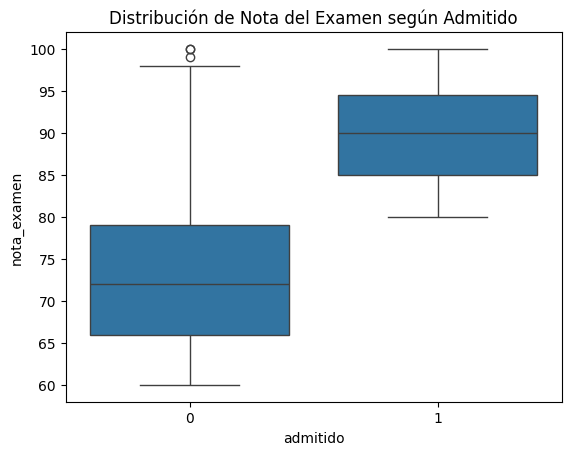

In [17]:
#Usamos gráficos de dispersión para ver la relación entre las variables independientes y la variable dependiente de Nota del Examen de Admitido:
sns.boxplot(x='admitido', y='nota_examen', data=df)
plt.title('Distribución de Nota del Examen según Admitido')
plt.show()


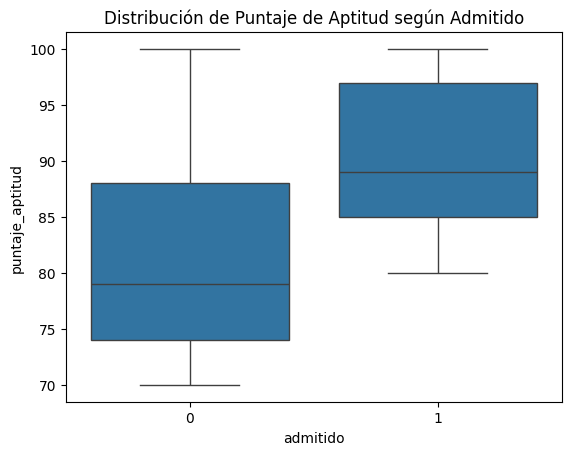

In [18]:
#Usamos gráficos de dispersión para ver la relación entre las variables independientes y la variable dependiente de Aptitud según Admitido:
sns.boxplot(x='admitido', y='puntaje_aptitud', data=df)
plt.title('Distribución de Puntaje de Aptitud según Admitido')
plt.show()


In [19]:
# Separar variables independientes y dependiente. Dividimos nuestros datos en variables independientes (X) y dependiente (y):
X = df[['nota_examen', 'puntaje_aptitud']]
y = df['admitido']

In [20]:
#Dividir el Conjunto de Datos en Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Proporción de aciertos y errores
print("Predicciones correctas:", sum(y_pred == y_test))
print("Predicciones incorrectas:", sum(y_pred != y_test))

Matriz de confusión:
 [[37  4]
 [ 6 13]]
Precisión del modelo: 0.8333333333333334
Predicciones correctas: 50
Predicciones incorrectas: 10


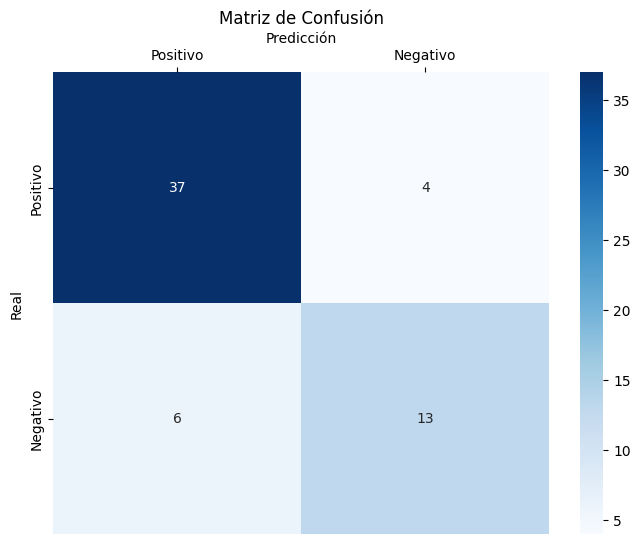

In [23]:
# Crear una figura y un eje
plt.figure(figsize=(8, 6))

# Crear un heatmap con la matriz de confusión
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            yticklabels=['Positivo', 'Negativo'],
            xticklabels=['Positivo', 'Negativo']
            )

# Añadir etiquetas y título
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

# Modificar las etiquetas del eje x para que aparezcan arriba
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.show()

In [24]:
# Generar la matriz de confusión


# Extraer los valores de TP, FP, TN y FN
TP = conf_matrix[0, 0]  # Verdaderos Positivos
TN = conf_matrix[1, 1]  # Verdaderos Negativos
FP = conf_matrix[0, 1]  # Falsos Positivos
FN = conf_matrix[1, 0]  # Falsos Negativos

# Imprimir los resultados
print(f'Verdaderos Positivos (TP): {TP}')
print(f'Falsos Positivos (FP): {FP}')
print(f'Falsos Negativos (FN): {FN}')
print(f'Verdaderos Negativos (TN): {TN}')


Verdaderos Positivos (TP): 37
Falsos Positivos (FP): 4
Falsos Negativos (FN): 6
Verdaderos Negativos (TN): 13


In [25]:
# Mostrar precision and recall, junto con el resto de métricas
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.860     0.902     0.881        41
           1      0.765     0.684     0.722        19

    accuracy                          0.833        60
   macro avg      0.813     0.793     0.802        60
weighted avg      0.830     0.833     0.831        60



#### Análisis por clase:
Clase 0:
* Alta precisión y recall: Esto indica que el modelo es muy bueno identificando correctamente los casos positivos de la clase 0 y tiene pocas falsas alarmas.
* Alto F1-score: Confirma el buen equilibrio entre precisión y recall para esta clase.

Clase 1:
* Alta precisión: El modelo es bastante bueno en sus predicciones positivas para la clase 1, pero...
* Bajo recall: Está perdiendo muchos casos positivos de esta clase. Esto significa que el modelo no está capturando todos los ejemplos de la clase 1 que debería.
* F1-score más bajo: Refleja el desequilibrio entre precisión y recall para esta clase.
* Interpretación de las métricas generales:

Promedios
* Accuracy: El modelo es bastante preciso en general, acertando en el 80% de los casos.
* Macro average: Muestra un buen desempeño promedio para ambas clases, pero enmascara el desequilibrio en la clase 1.
* Weighted average: Considerando el número de muestras en cada clase, el desempeño general es ligeramente menor, lo que indica que el modelo se ve más afectado por el bajo rendimiento en la clase 1.

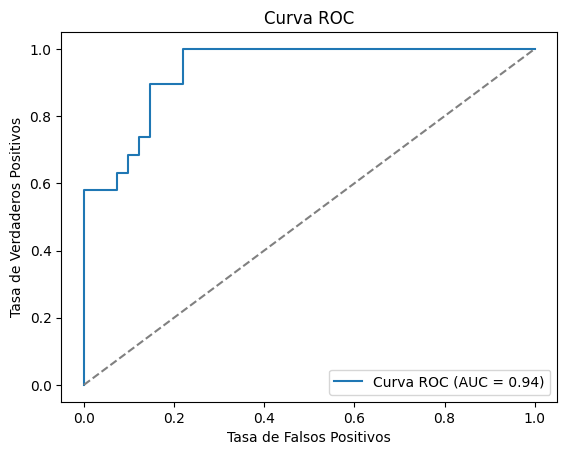

In [26]:
# Obtener probabilidades predichas
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



In [ ]:
# Supongamos que tienes los siguientes nuevos valores:
# Nota del examen y puntaje de aptitud
nuevos_valores = pd.DataFrame({
    'nota_examen': [82, 76, 90, 81],   # Nuevos valores de la nota del examen
    'puntaje_aptitud': [90, 70, 60, 30]  # Nuevos valores del puntaje de aptitud
})

# Usar el modelo para predecir
predicciones = model.predict(nuevos_valores)

# Mostrar las predicciones
for i in range(len(nuevos_valores)):
    resultado = "admitido" if predicciones[i] == 1 else "no admitido"
    print(f"Nuevos valores (Nota Examen: {nuevos_valores['nota_examen'][i]}, Puntaje Aptitud: {nuevos_valores['puntaje_aptitud'][i]}) -> {resultado}")


Nuevos valores (Nota Examen: 82, Puntaje Aptitud: 90) -> no admitido
Nuevos valores (Nota Examen: 76, Puntaje Aptitud: 70) -> no admitido
Nuevos valores (Nota Examen: 90, Puntaje Aptitud: 60) -> no admitido
Nuevos valores (Nota Examen: 81, Puntaje Aptitud: 30) -> no admitido


: 

# 2) Regresión Logística  Mulinomial

In [28]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

In [29]:
# Crear un DataFrame con las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la variable objetivo al DataFrame
df['species'] = iris.target

# Convertir los códigos de especies a nombres
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Mostrar las primeras filas del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la variable objetivo al DataFrame
df['species'] = iris.target

# Convertir los códigos de especies a nombres
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Mostrar una muestra de 5 observaciones de cada especie
df.groupby('species').head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [31]:
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar la variable objetivo al DataFrame
df['species'] = iris.target

# Convertir los códigos de especies a nombres
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Calcular el rango (mínimo y máximo) de 'petal length' y 'petal width' según 'species'
rango_petal = df.groupby('species')[['petal length (cm)', 'petal width (cm)']].agg(['min', 'max'])
print(rango_petal)


           petal length (cm)      petal width (cm)     
                         min  max              min  max
species                                                
setosa                   1.0  1.9              0.1  0.6
versicolor               3.0  5.1              1.0  1.8
virginica                4.5  6.9              1.4  2.5


Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Precisión del modelo: 1.0


c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


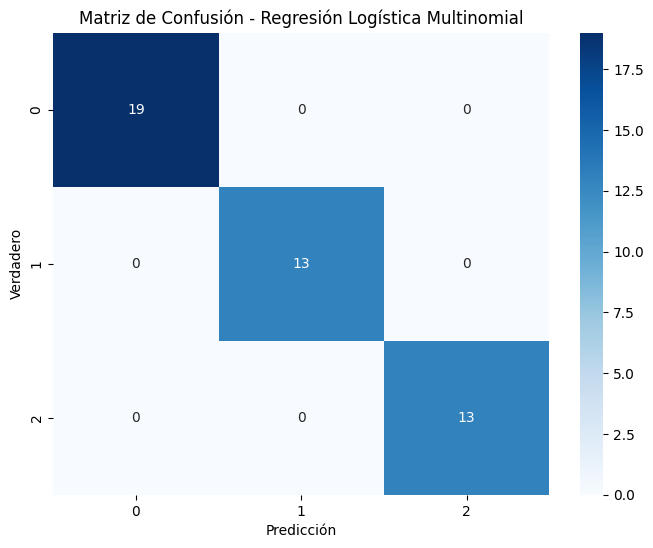

In [32]:

X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo de regresión logística (multinomial)
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_multi.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model_multi.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Regresión Logística Multinomial')
plt.show()


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Nuevos valores para predecir (deben tener la misma cantidad de características que el modelo)
nuevos_valores = [[5.1, 3.5, 1.4, 0.2],   # Ejemplo de un nuevo dato
                  [6.7, 3.1, 4.7, 1.5]]  # Ejemplo de otro nuevo dato

# Hacer la predicción
predicciones = model_multi.predict(nuevos_valores)

# Mostrar las predicciones
predicciones_nombres = iris.target_names[predicciones]  # Convertir números a nombres
for i, pred in enumerate(predicciones_nombres):
    print(f"Nuevos valores: {nuevos_valores[i]} -> Predicción: {pred}")

Nuevos valores: [5.1, 3.5, 1.4, 0.2] -> Predicción: setosa
Nuevos valores: [6.7, 3.1, 4.7, 1.5] -> Predicción: versicolor


In [35]:
# Mostrar una muestra de 3 observaciones de cada especie
df.groupby('species').head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica


c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mmazaauc\AppData\Local\Progr

Precisión por pliegue: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Precisión media de la validación cruzada: 0.9733333333333334
Matriz de confusión:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Precisión del modelo: 0.9733333333333334


c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


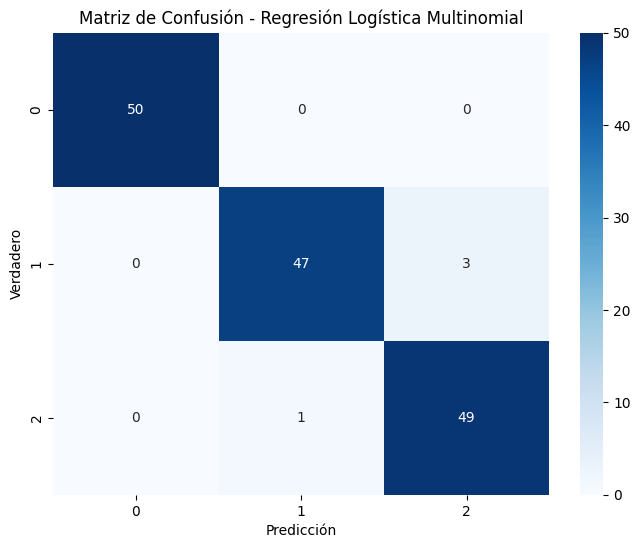

In [36]:
#modelo con validacion cruzada, aumento de interacciones y escalados
from sklearn.model_selection import train_test_split, cross_val_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_cross = iris.data
y_cross = iris.target


# Crear el modelo de regresión logística con más iteraciones
model_multi_cross = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Realizar la validación cruzada
scores = cross_val_score(model_multi_cross, X_cross, y_cross, cv=5)  # Aquí cv=5 significa 5-fold cross-validation

# Mostrar los resultados de la validación cruzada
print("Precisión por pliegue:", scores)
print("Precisión media de la validación cruzada:", scores.mean())

# Ajustar el modelo al conjunto completo de datos (opcional)
model_multi_cross.fit(X_cross, y_cross)

# Predecir en el conjunto de prueba para calcular la matriz de confusión
y_pred_cross = model_multi_cross.predict(X_cross)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_cross, y_pred_cross))
print("Precisión del modelo:", accuracy_score(y_cross, y_pred_cross))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_cross, y_pred_cross), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Regresión Logística Multinomial')
plt.show()


In [37]:
# Nombres de las clases
#target_names = ['Setosa', 'Versicolor', 'Virginica']

# Imprimir el informe de clasificación
#print(classification_report(y, y_pred, target_names=target_names))

# Nombres de las clases
#target_names = ['Setosa', 'Versicolor', 'Virginica']

# Imprimir el informe de clasificación
print(classification_report(y_cross, y_pred_cross))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [38]:
# Nuevos valores para predecir (deben tener la misma cantidad de características que el modelo)
nuevos_valores = [[5.1, 3.5, 1.4, 0.2],   # Ejemplo de un nuevo dato
                  [6.7, 3.1, 4.7, 1.5]]  # Ejemplo de otro nuevo dato

# Hacer la predicción
predicciones = model_multi_cross.predict(nuevos_valores)

# Mostrar las predicciones
#predicciones_nombres = iris.target_names[predicciones]  # Convertir números a nombres
for i, pred in enumerate(predicciones_nombres):
    print(f"Nuevos valores: {nuevos_valores[i]} -> Predicción: {pred}")

Nuevos valores: [5.1, 3.5, 1.4, 0.2] -> Predicción: setosa
Nuevos valores: [6.7, 3.1, 4.7, 1.5] -> Predicción: versicolor


In [39]:
# Mostrar una muestra de 5 observaciones de cada especie
df.groupby('species').head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
